In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sb
%matplotlib inline


In [79]:
# read csv file
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [70]:
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [38]:
train_data.describe()

,x,y
count,700.000000,700.000000
mean,0.015576,0.477146
std,0.038152,0.258078
min,0.000000,0.000000
25%,0.007082,0.255748
50%,0.013880,0.469657
75%,0.021246,0.698425
max,1.000000,1.000000


In [41]:
train_data.columns

Index(['x', 'y'], dtype='object')

In [42]:
train_data.dtypes

x    float64
y    float64
dtype: object

In [58]:
# checking null values in dataset
train_data.isnull().any()

x    False
y    False
dtype: bool

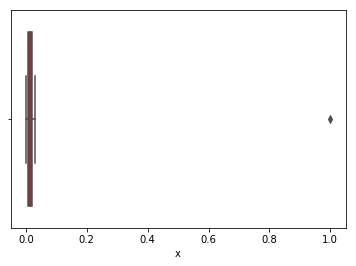

In [76]:
# boxplot to find the outliers in column x in train dataset
sb.boxplot(train_data['x'], color='r')

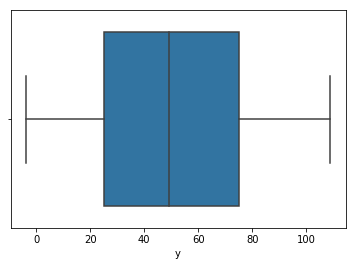

In [82]:
# boxplot to find out the outlier for column y in train dataset
sb.boxplot(train_data['y'])

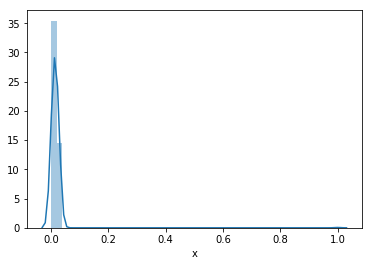

In [129]:
# disploting the feature  variable
sb.distplot(train_data['x'])

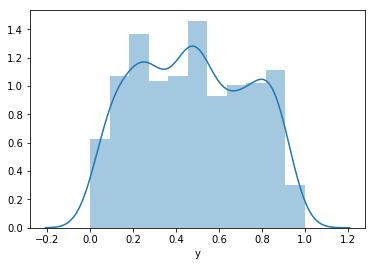

In [130]:
# disploting the feature variable
sb.distplot(train_data['y'])

Skewness is 26.45751311064591
Mean is 0.001428571428621544 , Median is  1.3778949614386372e-15 
which shows that column data are skewed data


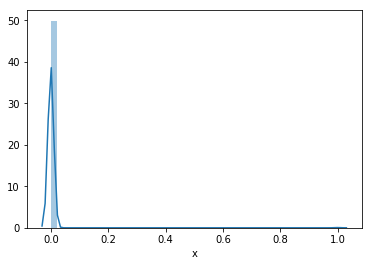

In [133]:
# feature variable
target = (np.square((train_data['x'])))
print ('Skewness is', target.skew())
print("Mean is",target.mean(), ", Median is ", target.median(), "\nwhich shows that column data are skewed data")
sb.distplot(target)
train_data['x'] = target

0.8799419020367513 1.068714161172438
Accuracy: 79.13220674330638


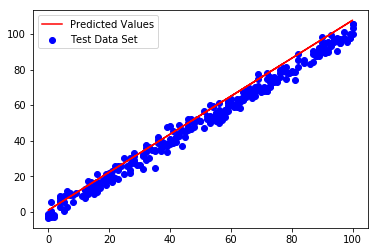

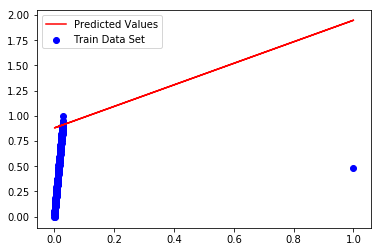

In [128]:
# data preprocessing on given dataset
import pandas as pd
import numpy as np

# load dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

class LinearRegression:
    
    def __init__(self):
        self.learning_rate = 0.1
        self.theta_0 = 0
        self.theat_1 = 1
        self.epoch = 1000

#         handle missing data
    def handle_missing_data(self):
        train_data.replace(np.NaN,train_data.mean(),inplace=True)
        test_data.replace(np.NaN,test_data.mean(),inplace=True)
        return  train_data,test_data
       
    def feature_scaling(self, dataset_train):
#         normalization of dataset
        for name in dataset_train.columns:
#             dataset_train[name] = (dataset_train[name] - dataset_train[name].mean())/ np.nanstd(dataset_train[name])
            dataset_train[name] = (dataset_train[name] - dataset_train[name].min()) / (dataset_train[name].max()-dataset_train[name].min())
        return dataset_train
        
    def gradient_descent(self,x_data,y_data):
        
        h1 = h2 =0
        theta_0 = self.theta_0
        theta_1 = self.theat_1
        for i in  range(self.epoch):
            for data  in range(len(x_data)):
                hypo = theta_0 + (theta_1 * x_data[data])
                h1 += (hypo - y_data[data])
                h2 += ((hypo - y_data[data]) * x_data[data])
#             temp_1 = (self.learning_rate * h1)
#             temp_2 = (self.learning_rate * h2)
            theta_0 = theta_0 - ((self.learning_rate * h1) / len(x_data))
            theta_1 = theta_1 - ((self.learning_rate * h2) / len(x_data))
        return theta_0,theta_1
    
    def test(self, x_test_data, theta_0, theta_1):
        y_predict = [0]*len(x_test_data)
        for i in range(len(x_test_data)):
#             y_predict[i] = theta_1*x_test_data[i] + theta_0
              y_predict[i] = (theta_0 + (theta_1*x_test_data[i]))
        return y_predict

    def accuracy(self, y_test_data, y_predicted):
        diff = 0
        for i in range(len(y_test_data)):
            diff += abs((y_predicted[i] - y_test_data[i])/y_test_data[i])
        diff  =  (diff/len(y_test_data))
        data_accuracy = 1 - diff
        return data_accuracy*100       
    
    def plot_theta_0(self):
        plot_theta_0 =  0
        for i in range(epoch):
            if  i%100==0:
                plot_theta_0[i] = epoch
        return plot_theta_0
    

def main():
    obj =LinearRegression()
#     handle missing values to get data clean
    train_data, test_data = obj.handle_missing_data()
    train_data = obj.feature_scaling(train_data)

    x_train_data = np.array(train_data["x"])
    y_train_data = np.array(train_data["y"])
    
    x_test_data = np.array(test_data["x"])
    y_test_data = np.array(test_data["y"])
    
#     calculate gradient descent on train data for test data
    theta_0, theta_1= obj.gradient_descent(x_train_data,y_train_data)
    print(theta_0,theta_1)
    
#     test data over train data 
    y_prediction_test =obj.test(x_test_data,theta_0,theta_1)
    y_prediction_train = obj.test(x_train_data,theta_0,theta_1)
    
#     get accuracy of predicted value to original value
    accuracy = obj.accuracy(y_test_data,y_prediction_test)
    print("Accuracy:",accuracy)
    
#     plotting test data set over prediction value
    plt.scatter(x_test_data, y_test_data, color='b', label='Test Data Set')
    plt.plot(x_test_data, y_prediction_test, color='r', label='Predicted Values')
    plt.legend()
    plt.show()

    plt.scatter(x_train_data, y_train_data, color='b', label='Train Data Set')
    plt.plot(x_train_data, y_prediction_train, color='r', label='Predicted Values')
    plt.legend()
    plt.show()
    
    

if __name__ == '__main__':
    main()